In [4]:
import pandas as pd

import seaborn as sns

#AGO:
# I need to create a queury that extracts best player in every position after every gameweek.
#  we need to recreate what would be a succesfull strategy after every week.
#  we have to bare in mind that we have the constraints : cost of football teamplayers,
# can I create a random team selection? Then calculate costs of such a team? Tournament?, 
# How do i calculate the most optimal team seleaction irrespective of the initial team selection?
# What if we restrict team valuation picks and calculate best team under these cosntraints?
# who is has been the most popular players by transfers by people?
# cumaltive measures by players?
# 

In [5]:
gameweek = pd.read_csv('/Users/nduqwele/Code/GithubProjects/Fantasy-Premier-League/data/2021-22/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme

In [16]:

gameweek.columns

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [18]:

gameweek[(gameweek['position']=='FWD') & (gameweek['GW']==12)].sort_values(by=['selected'], ascending=False)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
7167,Michail Antonio,FWD,West Ham,3.7,0,0,5,0,22.8,413,120,1,0,4.3,3.2,2021-11-20T15:00:00Z,90,20,0,0,0,0,12,0,4191532,0,1,17.0,2,138241,233939,95698,82,False,0,12
6750,Cristiano Ronaldo dos Santos Aveiro,FWD,Man Utd,5.8,1,0,12,0,22.3,579,119,4,0,9.7,21.2,2021-11-20T15:00:00Z,90,18,0,0,0,0,12,0,2756677,1,4,53.0,5,38,134296,134258,124,False,0,12
6917,Jamie Vardy,FWD,Leicester,0.5,0,0,0,0,1.5,205,113,3,0,0.7,0.0,2021-11-20T12:30:00Z,90,6,0,0,0,0,12,0,2293153,3,0,8.0,2,-329398,76131,405529,107,True,0,12
7026,Ivan Toney,FWD,Brentford,3.3,0,0,22,0,11.4,78,116,3,1,10.2,44.4,2021-11-20T15:00:00Z,90,14,0,0,0,0,12,0,1830244,3,3,46.0,6,-136963,54415,191378,67,False,0,12
6946,Allan Saint-Maximin,FWD,Newcastle,3.5,1,2,31,0,22.4,307,116,3,1,12.4,38.2,2021-11-20T15:00:00Z,90,3,0,0,0,0,12,0,1341089,3,3,63.0,10,31110,117303,86193,68,True,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,Olivier Giroud,FWD,Chelsea,0.0,0,0,0,0,0.0,120,113,0,0,0.0,0.0,2021-11-20T12:30:00Z,0,9,0,0,0,0,12,0,1294,3,0,0.0,0,-13,0,13,65,False,0,12
7219,Halil Dervişoğlu,FWD,Brentford,0.0,0,0,0,0,0.0,95,116,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,14,0,0,0,0,12,0,1207,3,3,0.0,0,-32,0,32,54,False,0,12
6615,Moise Kean,FWD,Everton,0.0,0,0,0,0,0.0,564,115,0,0,0.0,0.0,2021-11-21T14:00:00Z,0,12,0,0,0,0,12,0,1165,0,3,0.0,0,-12,0,12,60,False,0,12
7224,Jordan Hugill,FWD,Norwich,0.0,0,0,0,0,0.0,322,117,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,16,0,0,0,0,12,0,893,1,2,0.0,0,-27,0,27,54,True,0,12


In [8]:

# Trend Analysis trafers of players DEF over the course of the gameweek.
T1 = gameweek[['name','position','transfers_in', 'transfers_out','selected','GW','total_points','minutes','transfers_balance','value','was_home']]
#trafers = 

In [32]:
# lets look at our simple data set
T1

,name,position,transfers_in,transfers_out,selected,GW,total_points,minutes,transfers_balance,value,was_home
0,Eric Bailly,DEF,0,0,9363,1,0,0,0,50,True
1,Keinan Davis,FWD,0,0,169789,1,0,0,0,45,False
2,Ayotomiwa Dele-Bashiru,MID,0,0,4092,1,0,0,0,45,True
3,James Ward-Prowse,MID,0,0,299682,1,2,90,0,65,False
4,Bruno Miguel Borges Fernandes,MID,0,0,3381004,1,20,90,0,120,True
...,...,...,...,...,...,...,...,...,...,...,...
24560,Wilfred Ndidi,MID,22,224,70366,38,0,0,-202,48,True
24561,Matt Ritchie,DEF,396,253,15999,38,1,1,143,49,False
24562,Nathan Redmond,MID,683,228,13856,38,2,82,455,59,False
24563,Mathew Ryan,GK,0,2,587,38,0,0,-2,45,True


In [11]:
Reece_Df = T1[(T1['name']=='Reece James')]
Mo_Salah_DF = T1[T1['name']=='Mohamed Salah']
#T1[(T1['name'=='João Pedro Cavaco Cancelo')]

In [12]:
# in the data there are ome dupliation issues that we might need to solve.
#we need to create some derivative fields in the 
import matplotlib.pyplot as plt

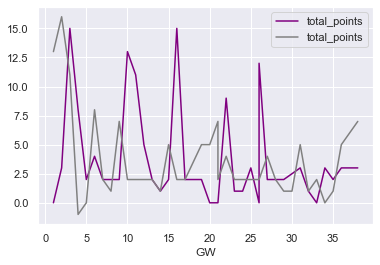

In [13]:
# gca stands for 'get current axis'
ax = plt.gca()

#Reece_Df.plot(kind='line',x='GW',y='total_points',ax=ax)

#Mo_Salah_DF.plot(kind='line',x='GW',y='total_points',color='red',ax=ax,)
#T1[T1['name']=='Heung-Min Son'].plot(kind='line',x='GW',y='total_points',color='green',ax=ax,)
T1[T1['name']=='Conor Gallagher'].plot(kind='line',x='GW',y='total_points',color='purple',ax=ax,)

T1[T1['name']=='Michail Antonio'].plot(kind='line',x='GW',y='total_points',color='grey',ax=ax,)
plt.show()

<AxesSubplot:xlabel='GW'>

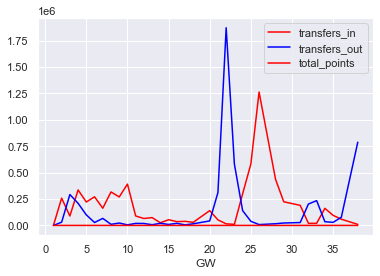

In [15]:
# lets see Mo Salahs buy and sell status

ax = plt.gca()

Mo_Salah_DF.plot(kind='line',x='GW',y='transfers_in',color='red',ax=ax,)
Mo_Salah_DF.plot(kind='line',x='GW',y='transfers_out',color='blue',ax=ax)
Mo_Salah_DF.plot(kind='line',x='GW',y='total_points',color='red',ax=ax)  # need to figure out how to plot on the secondary axis
